In [1]:
import numpy as np
from   numpy import exp,cos,sin,pi,tan,sqrt,angle,absolute,eye,dot
import matplotlib.pyplot as plt
from DeDist import dedist
from __future__ import division
import dill
import seaborn.apionly as sns

/home/parallels/miniconda2/envs/msc/lib/python2.7/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
# Get objects from notebook
dill.load_session('session_states/session_state_gauss.pkl')

### Plot - Correlation matrix

In [10]:
max_corr = 1.0
corr_length = 1.0
corr_mtx = construct_corr_matrix(max_corr, corr_length)

max_corr = 1.0
corr_length = 0.1
corr_mtx_2 = construct_corr_matrix(max_corr, corr_length)

max_corr = 1.0
corr_length = 10
corr_mtx_3 = construct_corr_matrix(max_corr, corr_length)

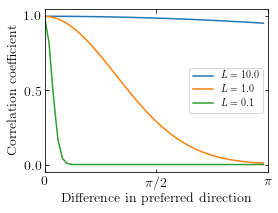

In [13]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

PREF_STIMS = np.linspace(-pi, pi, n_neurons+1)[:-1]

plt.plot(PREF_STIMS[50:], corr_mtx_3[50,50:], ls='solid', label='$L={0}$'.format(10.0))
plt.plot(PREF_STIMS[50:], corr_mtx[50,50:], ls='solid', label='$L={0}$'.format(1.0))
plt.plot(PREF_STIMS[50:], corr_mtx_2[50,50:], ls='solid', label='$L={0}$'.format(0.1))

plt.ylabel('Correlation coefficient')
plt.xlabel('Difference in preferred direction')

plt.tick_params(direction='in', top='on', right='on')
plt.xlim(xmin=0, xmax=PREF_STIMS[-1])

plt.yticks([0, 0.5, 1.0])
plt.xticks([0, pi/2, pi], [r'$0$', '$\pi/2$', r'$\pi$'])

plt.legend()

plt.show()
# plt.savefig('new_plots/2_corr_gauss/corr_coeff_L.pdf', format='pdf', bbox_inches='tight')

plt.close()

In [14]:
max_corr = 1.0
corr_length = 1.0
corr_mtx = construct_corr_matrix(max_corr, corr_length)

max_corr = 0.5
corr_length = 1.0
corr_mtx_2 = construct_corr_matrix(max_corr, corr_length)

max_corr = 0.2
corr_length = 1.0
corr_mtx_3 = construct_corr_matrix(max_corr, corr_length)

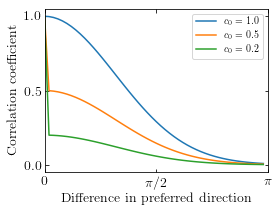

In [17]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

PREF_STIMS = np.linspace(-pi, pi, n_neurons+1)[:-1]

plt.plot(PREF_STIMS[50:], corr_mtx[50,50:], ls='solid', label='$c_0={0}$'.format(1.0))
plt.plot(PREF_STIMS[50:], corr_mtx_2[50,50:], ls='solid', label='$c_0={0}$'.format(0.5))
plt.plot(PREF_STIMS[50:], corr_mtx_3[50,50:], ls='solid', label='$c_0={0}$'.format(0.2))

plt.ylabel('Correlation coefficient')
plt.xlabel('Difference in preferred direction')

plt.tick_params(direction='in', top='on', right='on')
plt.xlim(xmin=0, xmax=PREF_STIMS[-1])

plt.yticks([0, 0.5, 1.0])
plt.xticks([0, pi/2, pi], [r'$0$', '$\pi/2$', r'$\pi$'])

plt.legend()

plt.show()
# plt.savefig('new_plots/2_corr_gauss/corr_coeff_c0.pdf', format='pdf', bbox_inches='tight')

plt.close()

In [18]:
max_corr = 1.0
corr_length = 1
corr_mtx = construct_corr_matrix(max_corr, corr_length)

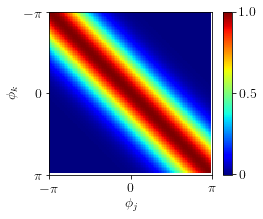

In [21]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

PREF_STIMS = np.linspace(-pi, pi, n_neurons+1)[:-1]

data_coords = [PREF_STIMS[0], PREF_STIMS[-1], PREF_STIMS[-1], PREF_STIMS[0]]
plt.imshow(corr_mtx, cmap='jet', extent=data_coords)
cbar = plt.colorbar(ticks=[0.005, 0.5, 1.0])
cbar.ax.set_yticklabels(['$0$', '$0.5$', '$1.0$'])

plt.xlabel(r'$\phi_j$')
plt.ylabel(r'$\phi_k$')

plt.xticks([-pi, 0, pi], [r'$-\pi$', '$0$', r'$\pi$'])
plt.yticks([-pi, 0, pi], [r'$-\pi$', '$0$', r'$\pi$'])

plt.show()
# plt.savefig('new_plots/2_corr_gauss/corr_matrix.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Plot - Bias vs Correlation length

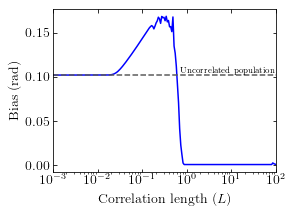

In [40]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

max_corr = 1.0
n_points = 200
corr_length_arr = np.logspace(start=-3, stop=2, num=n_points)
corr_length_arr = np.round(corr_length_arr, 4)

plt.plot(corr_length_arr, biases_theta_GP, color='b', ls='solid')

plt.axhline(y=bias_uncorr_theta_0_GP, color='0.35', ls='dashed')
plt.text(10**(-0.15), 0.105, 'Uncorrelated population', fontsize=8.5)

plt.tick_params(direction='in', top='on', right='on')

plt.xscale('log')
plt.xlabel('Correlation length ($L$)')
plt.ylabel('Bias (rad)')

plt.xlim(xmin=corr_length_arr[0], xmax=corr_length_arr[-1])

plt.show()
# plt.savefig('new_plots/2_corr_gauss/bias_corr_len.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Plot - Variance vs Correlation length

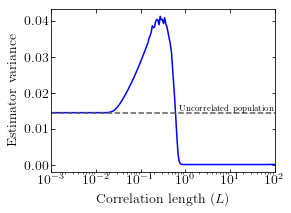

In [44]:
plt.figure(figsize=(4,3))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

max_corr = 1.0
n_points = 200
corr_length_arr = np.logspace(start=-3, stop=2, num=n_points)
corr_length_arr = np.round(corr_length_arr, 4)

plt.plot(corr_length_arr, variances_theta_GP, color='b', ls='solid')

plt.axhline(y=var_uncorr_theta_0_GP, color='0.35', ls='dashed')
plt.text(10**(-0.15), 0.015, 'Uncorrelated population', fontsize=8.5)

plt.tick_params(direction='in', top='on', right='on')

plt.xscale('log')
plt.xlabel('Correlation length ($L$)')
plt.ylabel('Estimator variance')

plt.xlim(xmin=corr_length_arr[0], xmax=corr_length_arr[-1])

plt.show()
# plt.savefig('new_plots/2_corr_gauss/var_corr_len.pdf', format='pdf', bbox_inches='tight')

plt.close()

### Plot - Bias vs Encoded angle (showing distortions for increasing L)

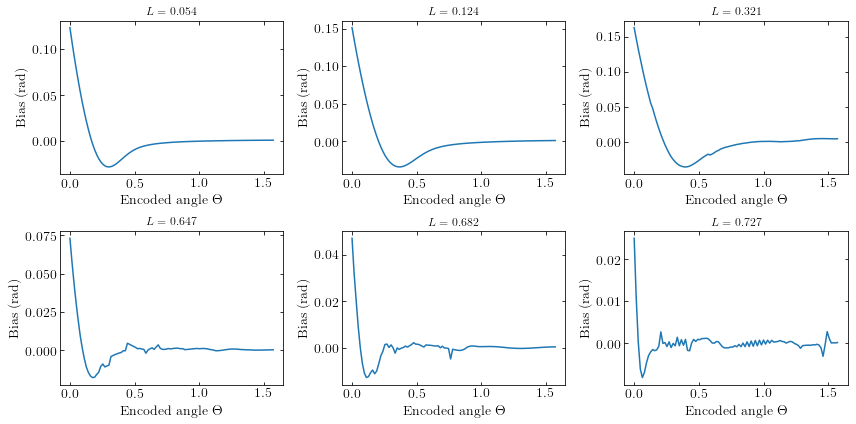

In [55]:
plt.figure(figsize=(12,6))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

corr_length_arr = np.asarray([0.054, 0.124, 0.321, 0.647, 0.682, 0.727])

show_ML = False

plt.subplot(231)
corr_length = corr_length_arr[0]
lbl = get_corr_param_dict_lbl(corr_length=corr_length)
biases = GP_ests[lbl][1]
plt.plot(THETAS, biases, label='GP')
biases = ML_ests[lbl][1]
if show_ML:
    plt.plot(THETAS, biases, '.', label='ML')

# plt.legend()
plt.title('$L={0}$'.format(corr_length))
plt.xlabel('Encoded angle $\Theta$')
plt.ylabel('Bias (rad)')
plt.tick_params(direction='in', top='on', right='on')


plt.subplot(232)
corr_length = corr_length_arr[1]
lbl = get_corr_param_dict_lbl(corr_length=corr_length)
biases = GP_ests[lbl][1]
plt.plot(THETAS, biases, label='GP')
biases = ML_ests[lbl][1]
if show_ML:
    plt.plot(THETAS, biases, '.', label='ML')

# plt.legend()
plt.title('$L={0}$'.format(corr_length))
plt.xlabel('Encoded angle $\Theta$')
plt.ylabel('Bias (rad)')
plt.tick_params(direction='in', top='on', right='on')


plt.subplot(233)
corr_length = corr_length_arr[2]
lbl = get_corr_param_dict_lbl(corr_length=corr_length)
biases = GP_ests[lbl][1]
plt.plot(THETAS, biases, label='GP')
biases = ML_ests[lbl][1]
if show_ML:
    plt.plot(THETAS, biases, '.', label='ML')

# plt.legend()
plt.title('$L={0}$'.format(corr_length))
plt.xlabel('Encoded angle $\Theta$')
plt.ylabel('Bias (rad)')
plt.tick_params(direction='in', top='on', right='on')


plt.subplot(234)
corr_length = corr_length_arr[3]
lbl = get_corr_param_dict_lbl(corr_length=corr_length)
biases = GP_ests[lbl][1]
plt.plot(THETAS, biases, label='GP')
biases = ML_ests[lbl][1]
if show_ML:
    plt.plot(THETAS, biases, '.', label='ML')

# plt.legend()
plt.title('$L={0}$'.format(corr_length))
plt.xlabel('Encoded angle $\Theta$')
plt.ylabel('Bias (rad)')
plt.tick_params(direction='in', top='on', right='on')

plt.subplot(235)
corr_length = corr_length_arr[4]
lbl = get_corr_param_dict_lbl(corr_length=corr_length)
biases = GP_ests[lbl][1]
plt.plot(THETAS, biases, label='GP')
biases = ML_ests[lbl][1]
if show_ML:
    plt.plot(THETAS, biases, '.', label='ML')

# plt.legend()
plt.title('$L={0}$'.format(corr_length))
plt.xlabel('Encoded angle $\Theta$')
plt.ylabel('Bias (rad)')
plt.tick_params(direction='in', top='on', right='on')


plt.subplot(236)
corr_length = corr_length_arr[5]
lbl = get_corr_param_dict_lbl(corr_length=corr_length)
biases = GP_ests[lbl][1]
plt.plot(THETAS, biases, label='GP')
biases = ML_ests[lbl][1]
if show_ML:
    plt.plot(THETAS, biases, '.', label='ML')

# plt.legend()
plt.title('$L={0}$'.format(corr_length))
plt.xlabel('Encoded angle $\Theta$')
plt.ylabel('Bias (rad)')
plt.tick_params(direction='in', top='on', right='on')

plt.tight_layout()
# plt.rcParams['figure.figsize'] = (10, 5)

plt.show()
# plt.savefig('new_plots/2_corr_gauss/bias_theta_errs.pdf', format='pdf', bbox_inches='tight')

plt.close()